In [23]:
import cv2
import json
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

#### json file read 

[[680.8521303258144, 726.4160401002505], [626.9674185463658, 715.1378446115287], [535.4887218045111, 728.9223057644108], [490.37593984962405, 771.5288220551378], [437.7443609022556, 826.6666666666666], [402.65664160401, 864.2606516290725], [334.98746867167915, 956.9924812030074], [309.92481203007515, 1007.1177944862154], [327.4686716791981, 1109.8746867167924], [417.69423558897233, 1114.887218045113], [505.4135338345864, 1190.0751879699246], [588.1203007518797, 1210.1253132832078], [655.7894736842104, 1215.1378446115286], [715.93984962406, 1185.0626566416038], [791.127819548872, 1134.9373433583958], [806.1654135338345, 1097.3433583959898], [806.1654135338345, 1054.7368421052631], [738.4962406015036, 1059.7493734335837], [710.9273182957393, 1002.1052631578947], [683.3583959899745, 967.017543859649], [741.002506265664, 919.3984962406014], [735.9899749373433, 856.7418546365914], [753.533834586466, 811.6290726817042], [751.0275689223056, 786.5664160401002], [733.4837092731829, 758.99749373

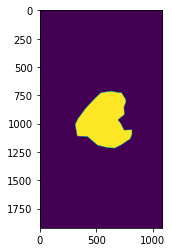

6220800


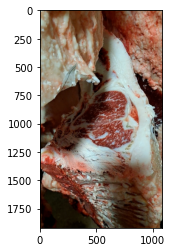

In [48]:
# 본인 이미지 경로에 맞춰 확인! 
img_1 = Image.open("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Image_2/QC_cow_segmentation_2_000375.jpg")
with open("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Label_2/QC_cow_segmentation_2_000375.json") as f:
    json_data = json.load(f)
    print(json_data['label_info']['shapes'][0]['points'])
    contour = json_data['label_info']['shapes'][0]['points']
    for i in range(len(contour)):
        contour[i][0] = int(contour[i][0])
        contour[i][1] = int(contour[i][1])
    
    img_1 = np.array(img_1)
    img_shape = img_1.shape
    print(img_shape)
    mask = np.zeros((img_shape[0],img_shape[1]),dtype = np.uint8)
    print(mask.shape)
    print(mask)
    print(type(contour)) # list
    polygon = contour
    print(polygon)
    polygon = np.array(polygon)
    print("-"*30)
    cv2.fillPoly(mask,[polygon],1)
    plt.imshow(mask)
    plt.show()
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    
plt.imshow(img_1)
print(img_1.size) 
# 1은 이미지 size가 (1080, 1920)로 맞춰짐
# (2268, 4032)도 존재...
